# Data Preprocessing Lab

Stephen Gale - stg5244@psu.edu <br>
Matthew Kerridge - mjk6560@psu.edu

# Phase 0 - Problem Scoping & Problem Description

Problem Description:

The problem at hand is the classification of websites into two categories: legitimate websites and phishing websites. Phishing websites are malicious sites created to deceive users into providing sensitive information, such as login credentials, personal details, or financial data. Detecting and distinguishing these phishing websites from legitimate ones is crucial for cybersecurity.

Stakeholders:

Internet Users - Daily internet goers who know little about security.
Cybersecurity Professionals- Professionals who work in this field and use this stuff daily.
Enterprises and Organizations- Companies who invest into this type of security to help them and their employees from geting their information stolen
Government and Regulatory Bodies- Government regulators who create jurisdiction on these topics to pursue to the fullest extend.

Importance of the Problem:

Financial Impact, Data Security, Reputation and Trust, National Security, Legal and Regulatory Consequences

Cases and Data from Literature:

Verizon's Data Breach Investigations Report (DBIR): Verizon's annual report highlights that phishing is one of the most common methods used in data breaches. The report consistently emphasizes the importance of phishing detection and prevention.

Symantec's Internet Security Threat Report: Symantec's annual report provides insights into global internet security threats. It frequently highlights phishing attacks and their impact on individuals and organizations.

In conclusion, the problem of detecting and preventing phishing websites is very important due to its financial, security, and societal implications. Stakeholders from individuals to governments have a vested interest in mitigating the risks associated with phishing attacks, making it a critical issue in the realm of cybersecurity.


Using Machine Learning for Phishing Detection:

Advantages:

Automation, Scalability, Feature Extraction, Adaptability, Anomaly Detection

Disadvantages:

Data Quality, Overfitting, Interpretability, Adversarial Attacks





Main Research Questions:

Can Machine Learning Detect Phishing Websites Effectively? The primary research question is whether machine learning algorithms can accurately differentiate between legitimate and phishing websites.

What Features and Data Sources Are Most Informative for Phishing Detection? This question aims to identify which features, such as URL structure, content, or server information, are most important for effective detection.

How Can Machine Learning Models Handle Evolving Phishing Techniques? Given that phishing techniques evolve, the research can focus on how machine learning models can adapt and detect new patterns and threats.

The goal of this research is to develop effective and efficient machine learning models for phishing detection that address the unique challenges posed by phishing threats while considering the advantages and disadvantages of machine learning in the cybersecurity domain.

# Project Phase I - Data Preprocessing

First, before we begin the preprocessing, we need to import Pandas, which is the main library we will be leveraging throughout this project.

Import statements that will be needed for data preprocessing.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce

Import the training dataset.

In [ ]:
# import data set
data = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", index_col="id", na_values=['',' ','n/a'])
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,5.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,5.0,78.0,1.0,1.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,4.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,3.0,1.0,6.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3.0,0.0,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
data_types = data.dtypes
print(set(data_types.values))

{dtype('float64'), dtype('int64')}


# Data preprocessing

##Handling the missing data

Check and mark the rows each row for missing values

In [ ]:
nan_rows_mask = data.isna().any(axis=1)
nan_row_indexes = data.index[nan_rows_mask]


Display the rows with missing values


In [ ]:
nan_data = data.loc[nan_row_indexes]
nan_row_indexes_list = nan_data.index
nan_data

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
7,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,2.0,0.0,1.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
903,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
980,2.0,0.0,3.0,52.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Data Imputation Process

Removing all rows that have missing values could be costly to the overall amount of rows we have to train with. Imputing too many missing values could also be misleading to our training model. So, we have elected to remove all rows with more than 2 missing values

In [ ]:
#Check and count each row for missing values
nan_counts = nan_data.isna().sum(axis=1)

#Identify rows missing 2 or more values
remove_list = nan_counts[nan_counts > 2].index

#Remove the rows
data.drop(index=remove_list, inplace=True)

print("Dropped rows:", list(remove_list))
print(data.shape)  #Check the shape of what is left

Dropped rows: [7, 903, 980, 1760, 1821, 2776, 2777, 2778, 2779, 2780]
(4990, 38)


Check and mark the rows each row for missing values after removal

In [ ]:
nan_rows_mask = data.isna().any(axis=1)
nan_row_indexes = data.index[nan_rows_mask]

Display the rows with missing values after removal

In [ ]:
nan_data = data.loc[nan_row_indexes]
nan_row_indexes_list = nan_data.index
nan_data

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
23,2.0,0.0,1.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1011,2.0,1.0,3.0,64.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1015,3.0,1.0,4.0,101.0,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1236,1.0,0.0,5.0,NaN,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Imputing Rows

In [ ]:
#Check each column for if they have any missing values
columns_with_nan = data.columns[data.isna().any()].tolist()
columns_with_nan

['UrlLength',
 'NumDashInHostname',
 'NumPercent',
 'NumQueryComponents',
 'NumHash',
 'NumNumericChars',
 'DomainInPaths',
 'HostnameLength',
 'PctExtResourceUrls']

Use KNN to impute missing values from the nearest 8 neighbors

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=8)
questions = data[columns_with_nan].to_numpy()
questions_imputed = imputer.fit_transform(questions)
data[columns_with_nan]=questions_imputed
data.loc[nan_row_indexes_list]

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
23,2.0,0.0,1.0,78.500,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
27,4.0,1.0,3.0,72.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
145,1.0,0.0,6.0,90.125,12.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
150,3.0,1.0,3.0,56.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
419,3.0,1.0,5.0,73.000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
831,1.0,0.0,0.0,30.000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1011,2.0,1.0,3.0,64.000,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1015,3.0,1.0,4.0,101.000,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1236,1.0,0.0,5.0,99.875,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Data Encoding & Clearing Outliers

Data encoding is important because it ensures or model will be able to interpet and learn from bianary or categorical feature of our data.

We will not have to encode any of the discrete or continuous data beacause they can already be interpreted, however we will have to remove outliers from these columns.

The following columns have been identified as discrete/continuous data:

- NumDots
- SubdomainLevel
- PathLevel
- UrlLength
- NumDash
- NumDashInHostname
- NumUnderscore
- NumPercent
- NumQueryComponents
- NumAmpersand
- NumHash
- NumNumericChars
- HostnameLength
- PathLength
- QueryLength
- NumSensitiveWords
- PctExtResourceUrls


We can use z-scores to find and remove outliers from our data set.

The z-score measures how many standard deviations a data point is from the mean. You can use it to detect and remove outliers. A common threshold for considering data as an outlier is if the z-score is beyond a 3.

Let's run our z-score check to update the dataframe to include only the data that passes that check; that is, columns that do not have a z-score greater than 3:

In [ ]:
from scipy import stats

# Print current DataFrame shape for comparison
print(data.shape)

# Define columns that we will check for outliers
numerical_cols = ["NumDots", "SubdomainLevel", "PathLevel", "UrlLength", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumQueryComponents", "NumAmpersand", "NumHash", "NumNumericChars", "HostnameLength", "PathLength", "QueryLength", "NumSensitiveWords", "PctExtResourceUrls"]

# Define a z-score threshold
z_threshold = 3

# Calculate z-scores for the selected columns
z_scores = stats.zscore(data[numerical_cols].astype(float))

# Create a boolean mask to identify outliers
outlier_mask = (abs(z_scores) <= z_threshold).all(axis=1)

# Update our DataFrame to only include data that are not outliers
data = data[outlier_mask]

# Print new DataFrame shape for comparison
print(data.shape)
data

(4990, 38)
(4250, 38)


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,RightClickDisabled,PopUpWindow,IframeOrFrame,MissingTitle,ImagesOnlyInForm,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,5.0,81.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,0.0,5.0,78.0,1.0,1.0,0.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,0.0,4.0,53.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,3.0,1.0,6.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3.0,0.0,3.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,3.0,1.0,1.0,67.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4997,1.0,0.0,2.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4998,3.0,2.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Data Encoding

Encoding is not necessary as data is able to be used as is.

# Data Normalization

Use a new column that will be responsible for all of the columns that pertain to URL complexity

In [ ]:
import numpy as np

#Create the variable for the averages
data["URLComplexity"] = np.mean(data[["NumDots", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumAmpersand", "NumHash"]],axis=1)
#Set a maximum
max_URL_Complexity = data['URLComplexity'].max()
#Set a minimum
min_URL_Complexity = data['URLComplexity'].min()
data["URLComplexity"] = (data["URLComplexity"]-min_URL_Complexity)/(max_URL_Complexity-min_URL_Complexity)
data["URLComplexity"]

<ipython-input-14-c5fbb6a7afef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["URLComplexity"] = np.mean(data[["NumDots", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumAmpersand", "NumHash"]],axis=1)
<ipython-input-14-c5fbb6a7afef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["URLComplexity"] = (data["URLComplexity"]-min_URL_Complexity)/(max_URL_Complexity-min_URL_Complexity)


id
1       0.3125
2       0.3750
3       0.1875
4       0.1250
5       0.1250
         ...  
4996    0.3125
4997    0.0625
4998    0.1250
4999    0.1250
5000    0.0000
Name: URLComplexity, Length: 4250, dtype: float64

# Project Phase II/ III - Exploratory Data Analysis & Feature Selection

Lets group the related variables into groups.

#Domain:
NumDots, SubdomainLevel, NumDashInHostname, AtSymbol, TildeSymbol,NumUnderscore, NumPercent, DomainInSubdomains, DomainInPaths, HostnameLength

#Path:
PathLevel, UrlLength, NumDash, NumQueryComponents, NumAmpersand, NumHash, NumNumericChars, PathLength, QueryLength, DoubleSlashInPath

#URL:
RandomString, IpAddress, PctExtResourceUrls, URLComplexity, HttpsInHostname, NumSensitiveWords, EmbeddedBrandName

#Website:
ExtFavicon, InsecureForms, RelativeFormAction, ExtFormAction, AbnormalFormAction, RightClickDisabled, PopUpWindow, IframeOrFrame, MissingTitle, ImagesOnlyInForm

#Lets pair each column in each catagory to eachother.

### Plot each domain combo

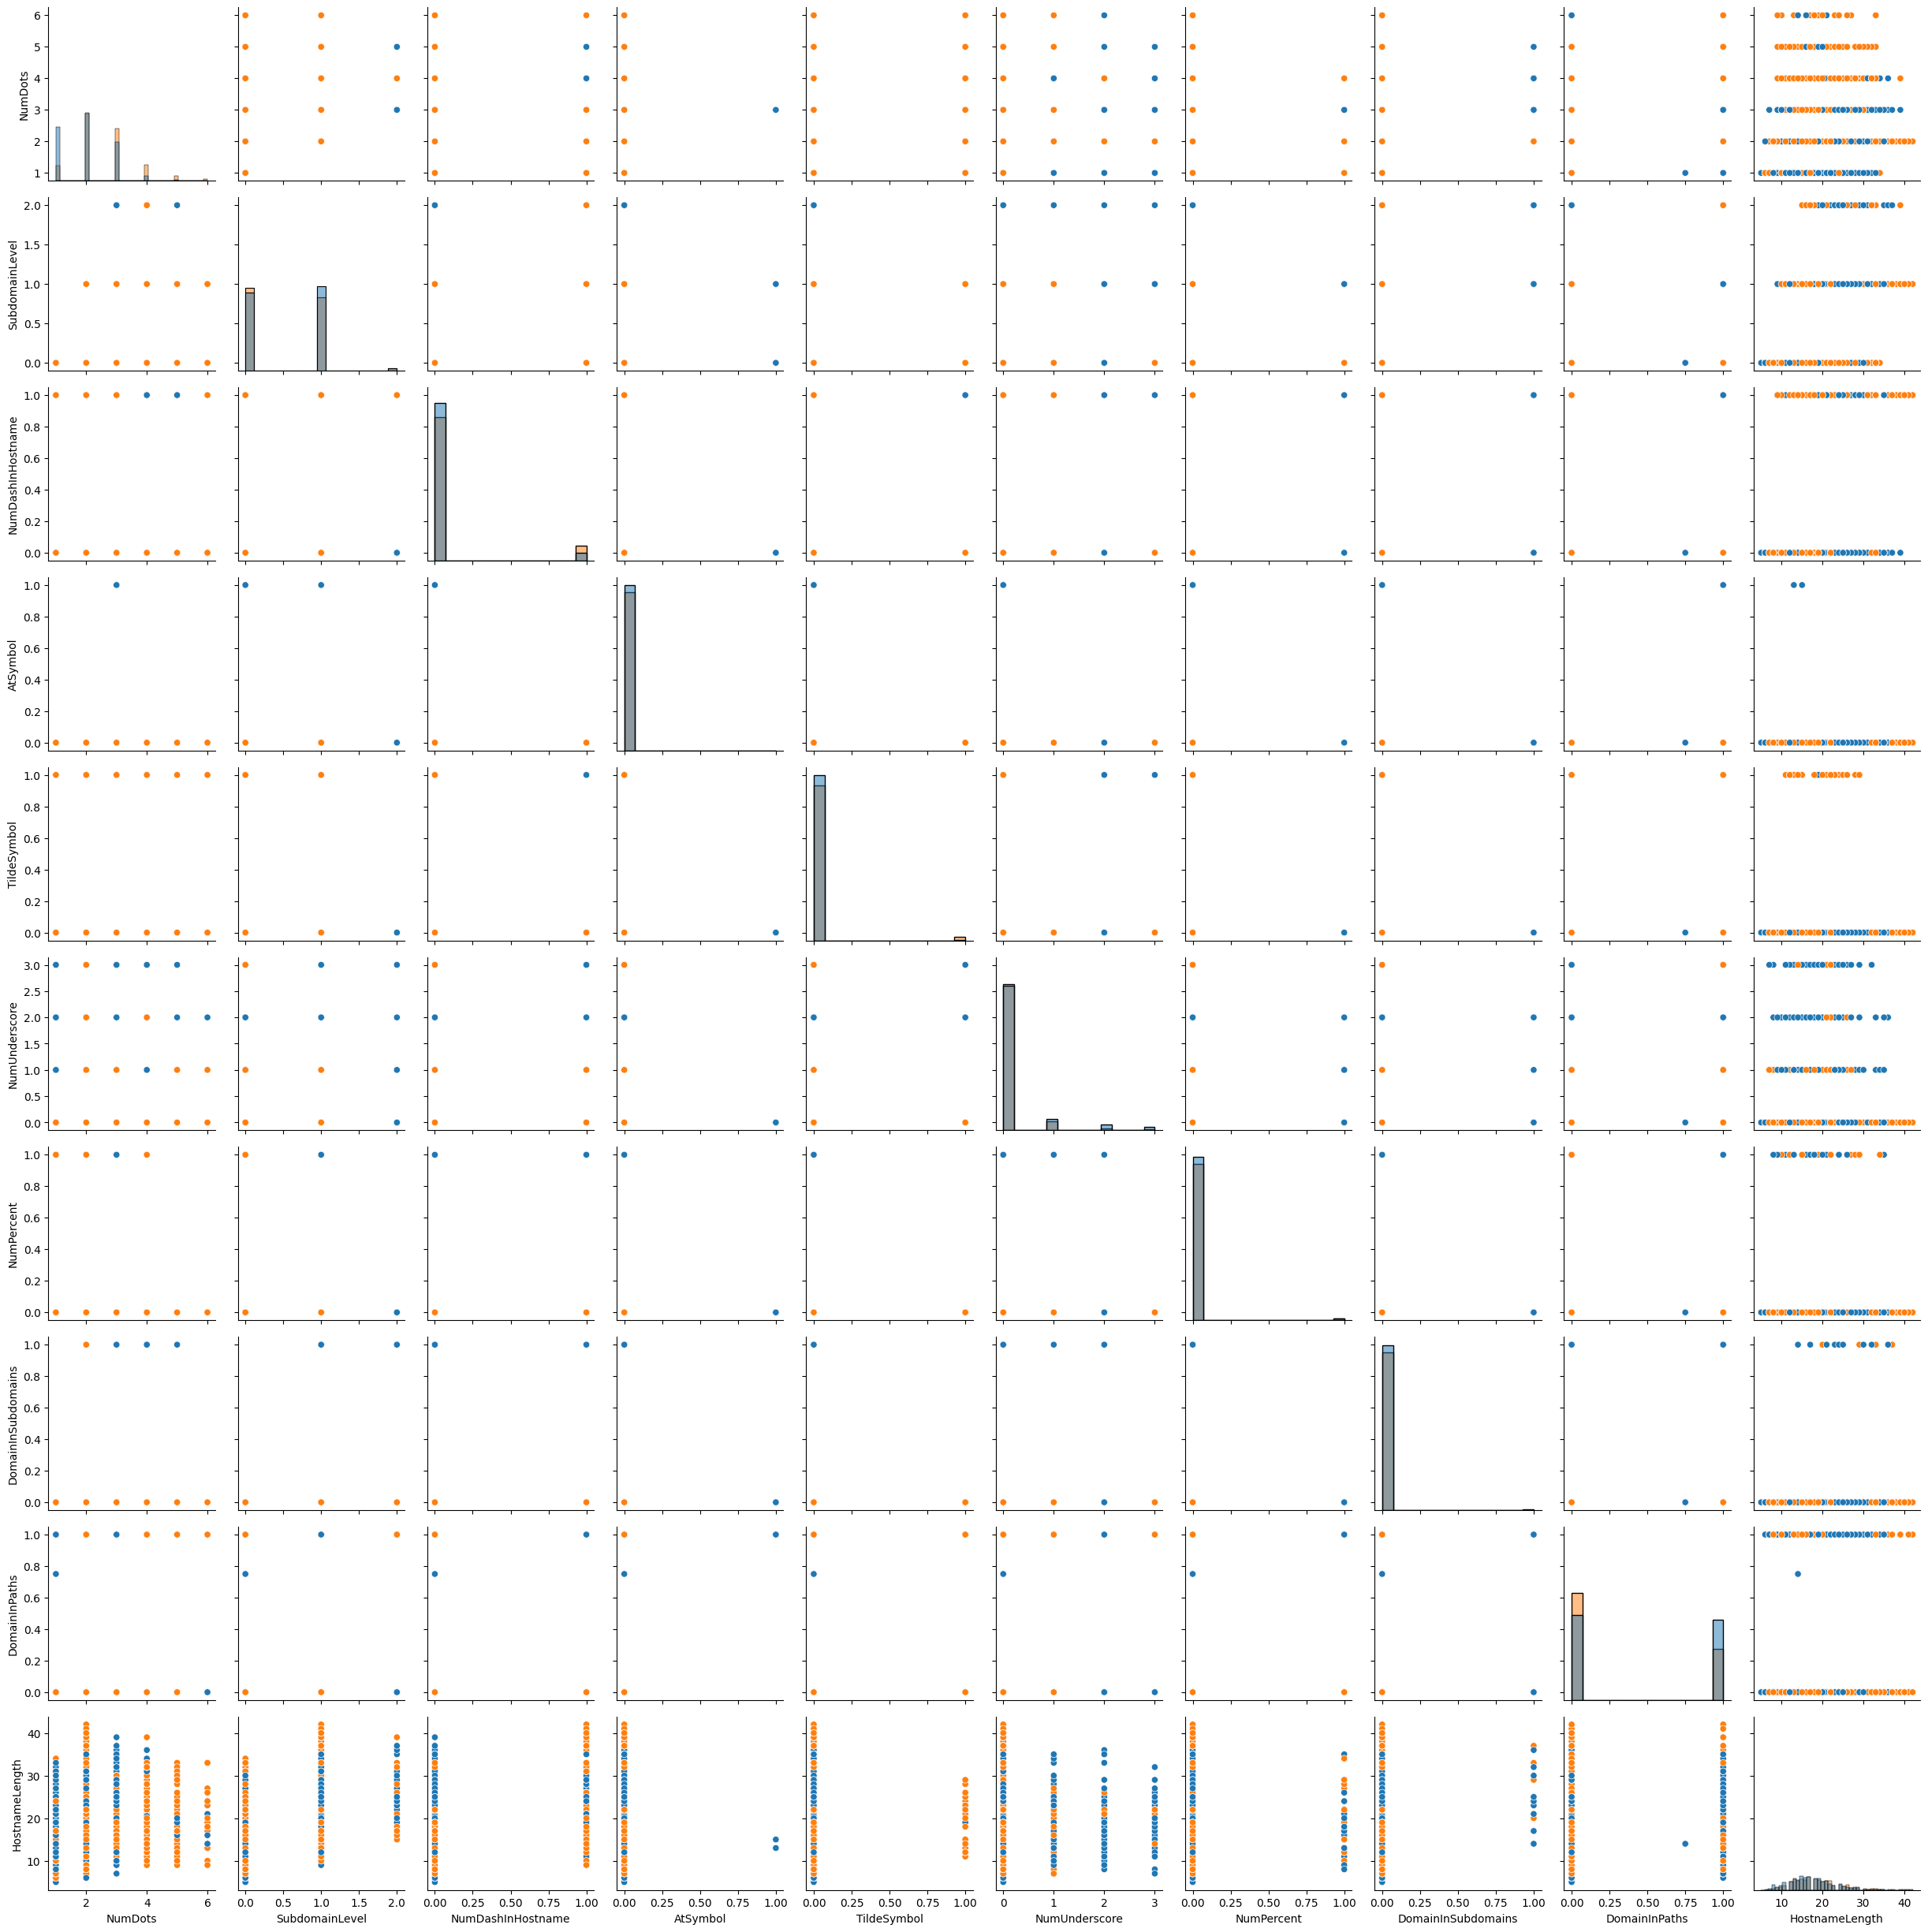

In [ ]:
import seaborn as sns

#Use the groups we determined above
plot_domain = ['CLASS_LABEL', 'NumDots', 'SubdomainLevel', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'DomainInSubdomains', 'DomainInPaths', 'HostnameLength']

#Create a pair plot for each combo
g_domain = sns.PairGrid(data[plot_domain], hue='CLASS_LABEL')
g_domain.map_diag(sns.histplot)
g_domain.map_offdiag(sns.scatterplot)

In these pair plots we can see that TildeSymbol, DomainInPaths, and Atsymbol are fairly correlated.

### Plot each path combo

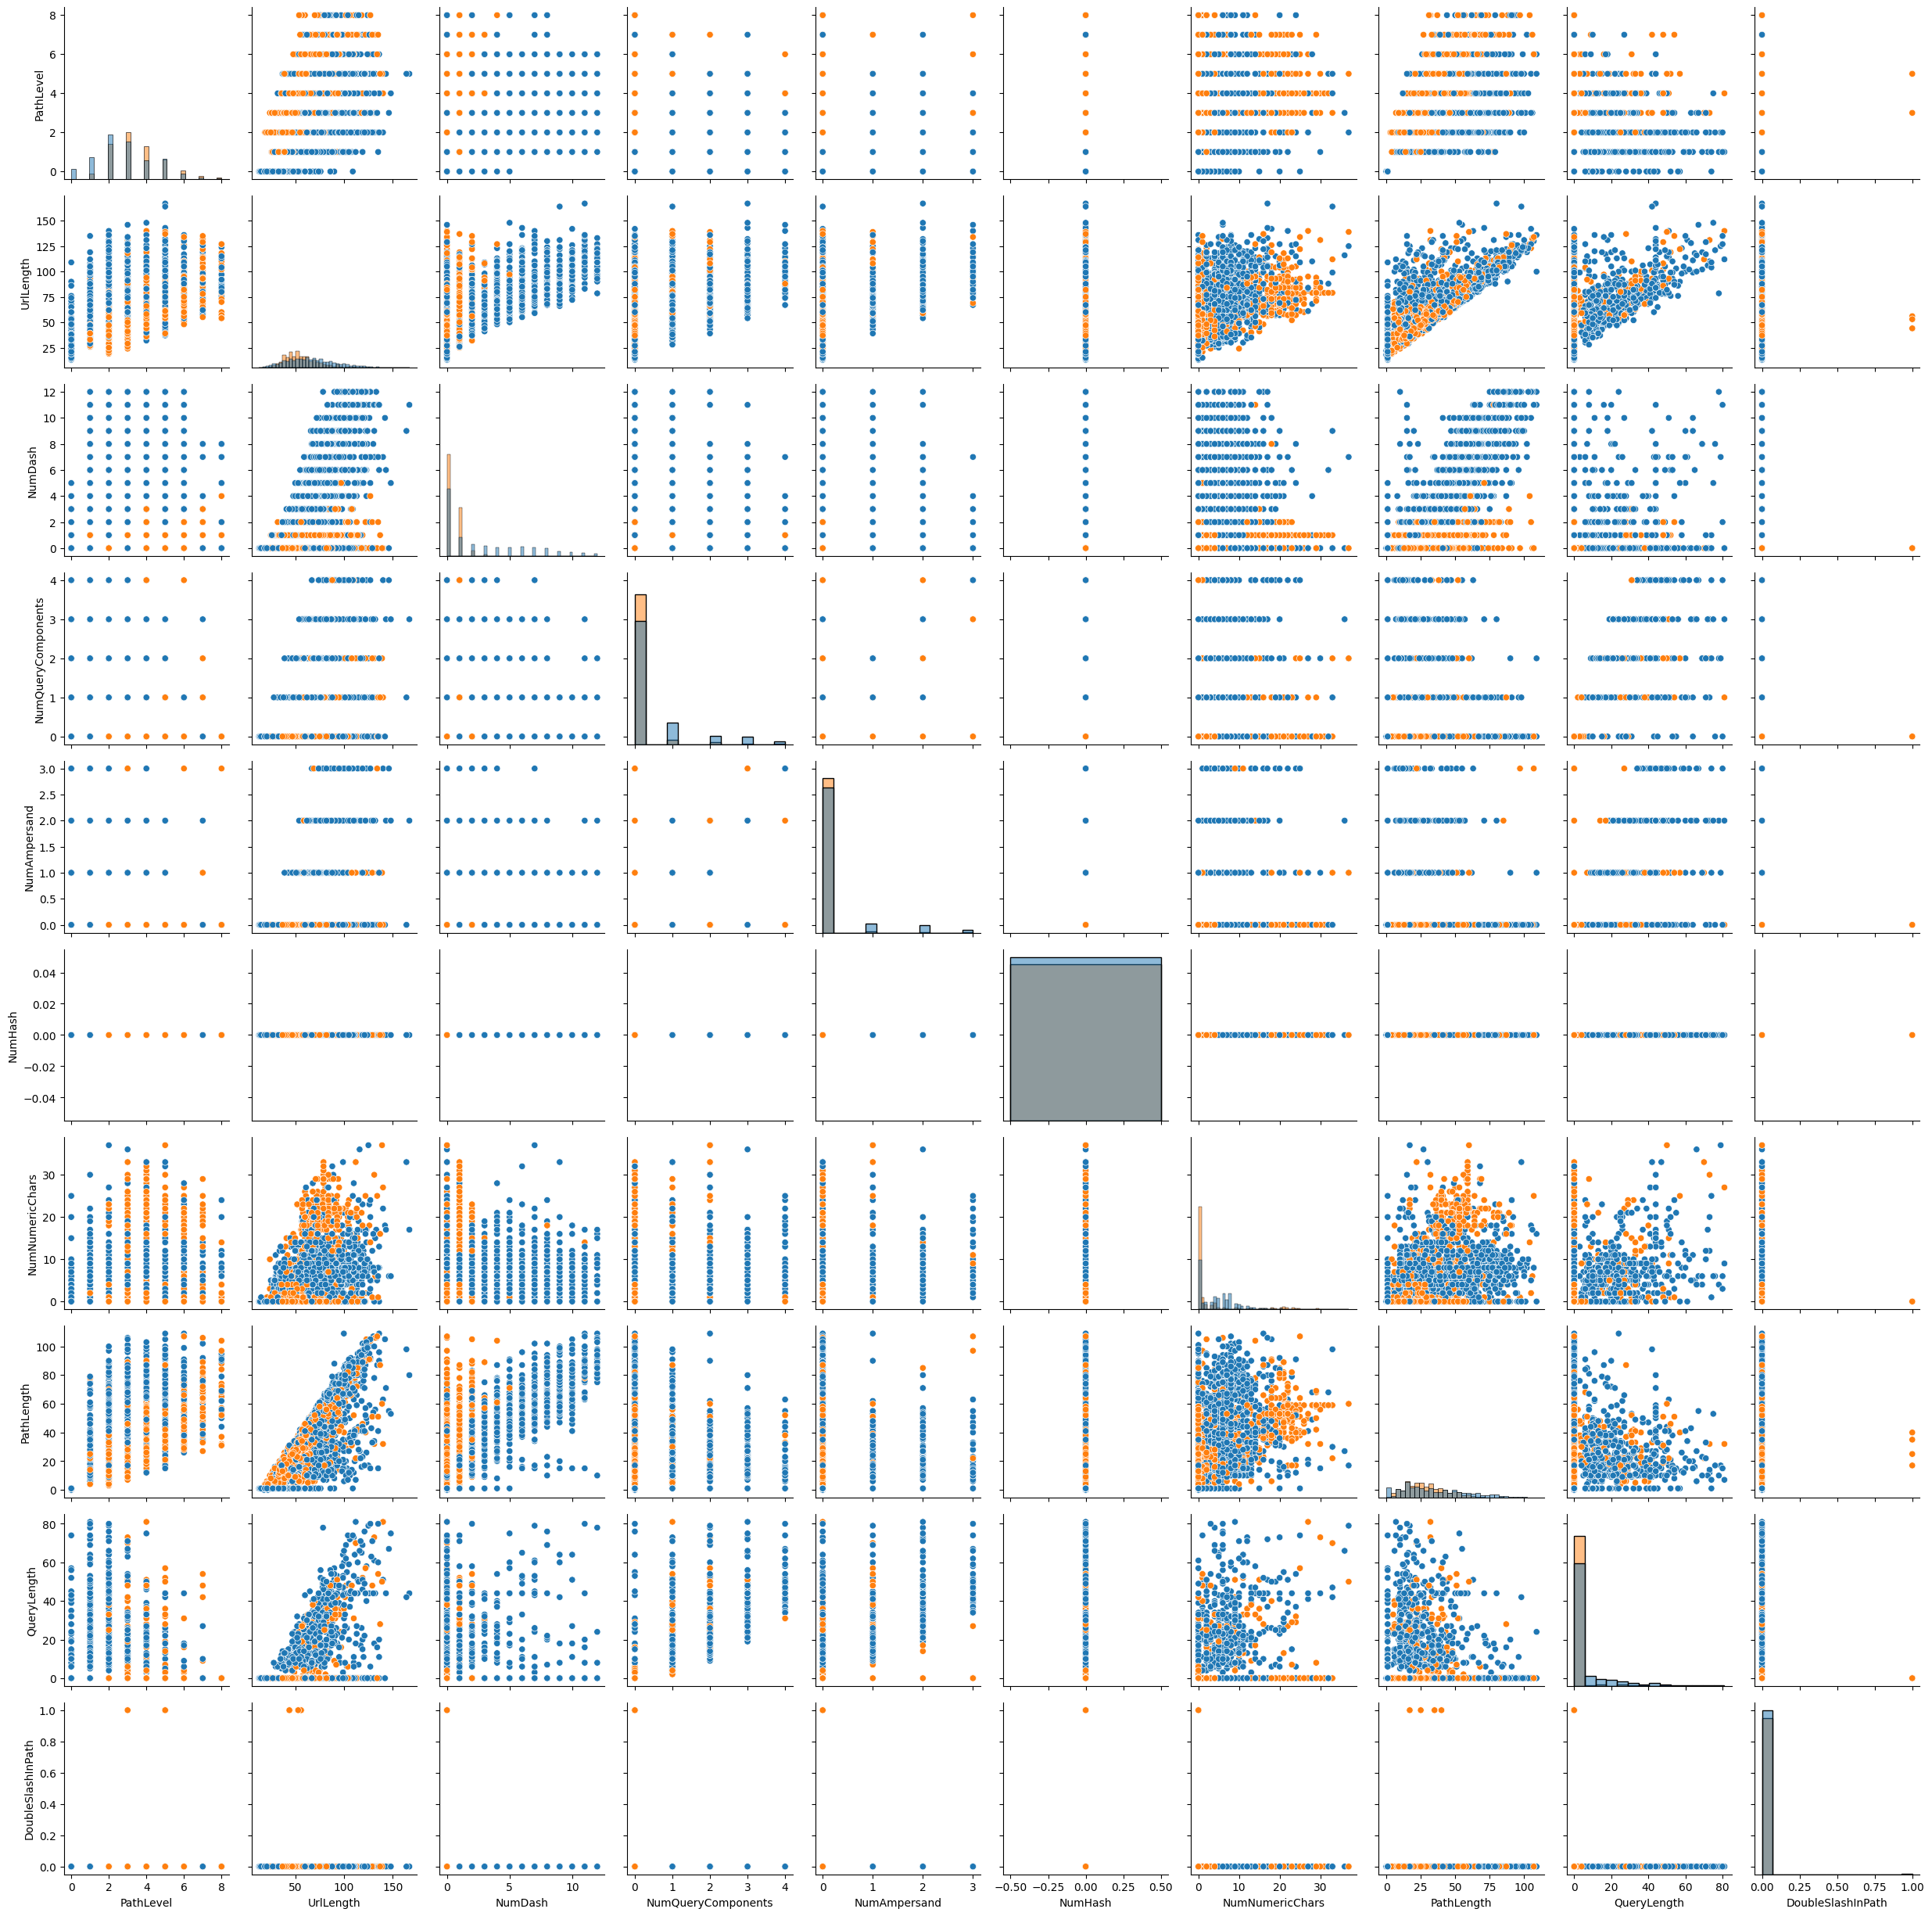

In [ ]:
#Use the groups we determined above
plot_path = ['CLASS_LABEL', 'PathLevel', 'UrlLength', 'NumDash', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'PathLength', 'QueryLength', 'DoubleSlashInPath']

#Create a pair plot for each combo
g_path = sns.PairGrid(data[plot_path], hue='CLASS_LABEL')
g_path.map_diag(sns.histplot)
g_path.map_offdiag(sns.scatterplot)

NumHash and DoubleSlashInPath are also correlated

### Plot each URL combo

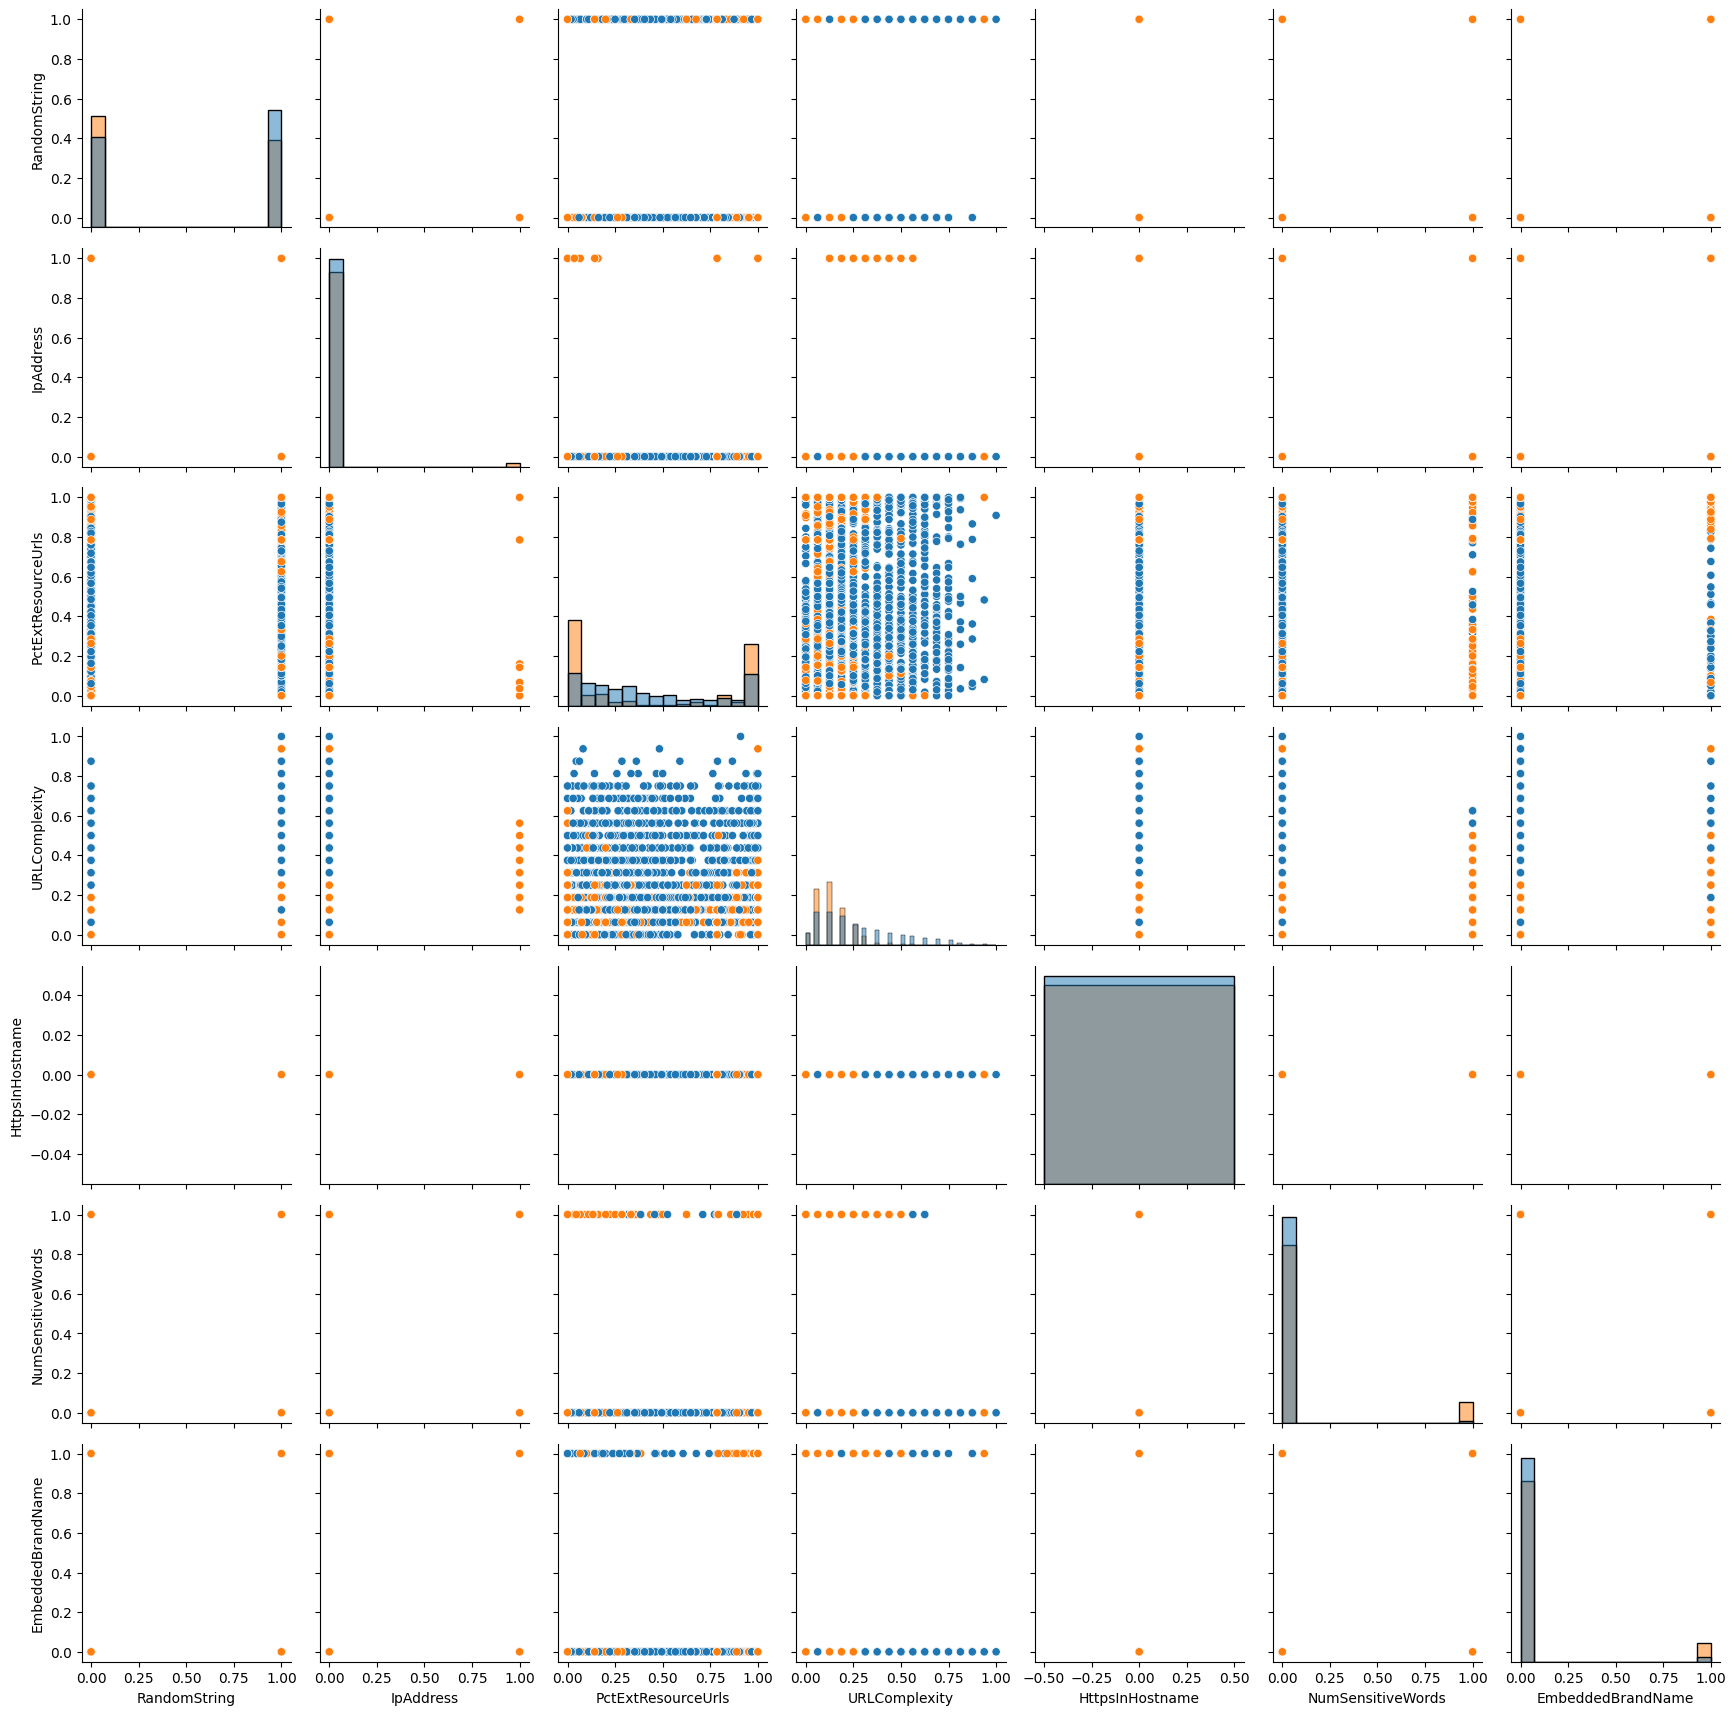

In [ ]:
#Use the groups we determined above
plot_url = ['CLASS_LABEL', 'RandomString', 'IpAddress', 'PctExtResourceUrls', 'URLComplexity', 'HttpsInHostname', 'NumSensitiveWords', 'EmbeddedBrandName']

#Create a pair plot for each combo
g_url = sns.PairGrid(data[plot_url], hue='CLASS_LABEL')
g_url.map_diag(sns.histplot)
g_url.map_offdiag(sns.scatterplot)

NumSensitiveWords and HttpsInHostname are highly correlated

### Plot each website combo

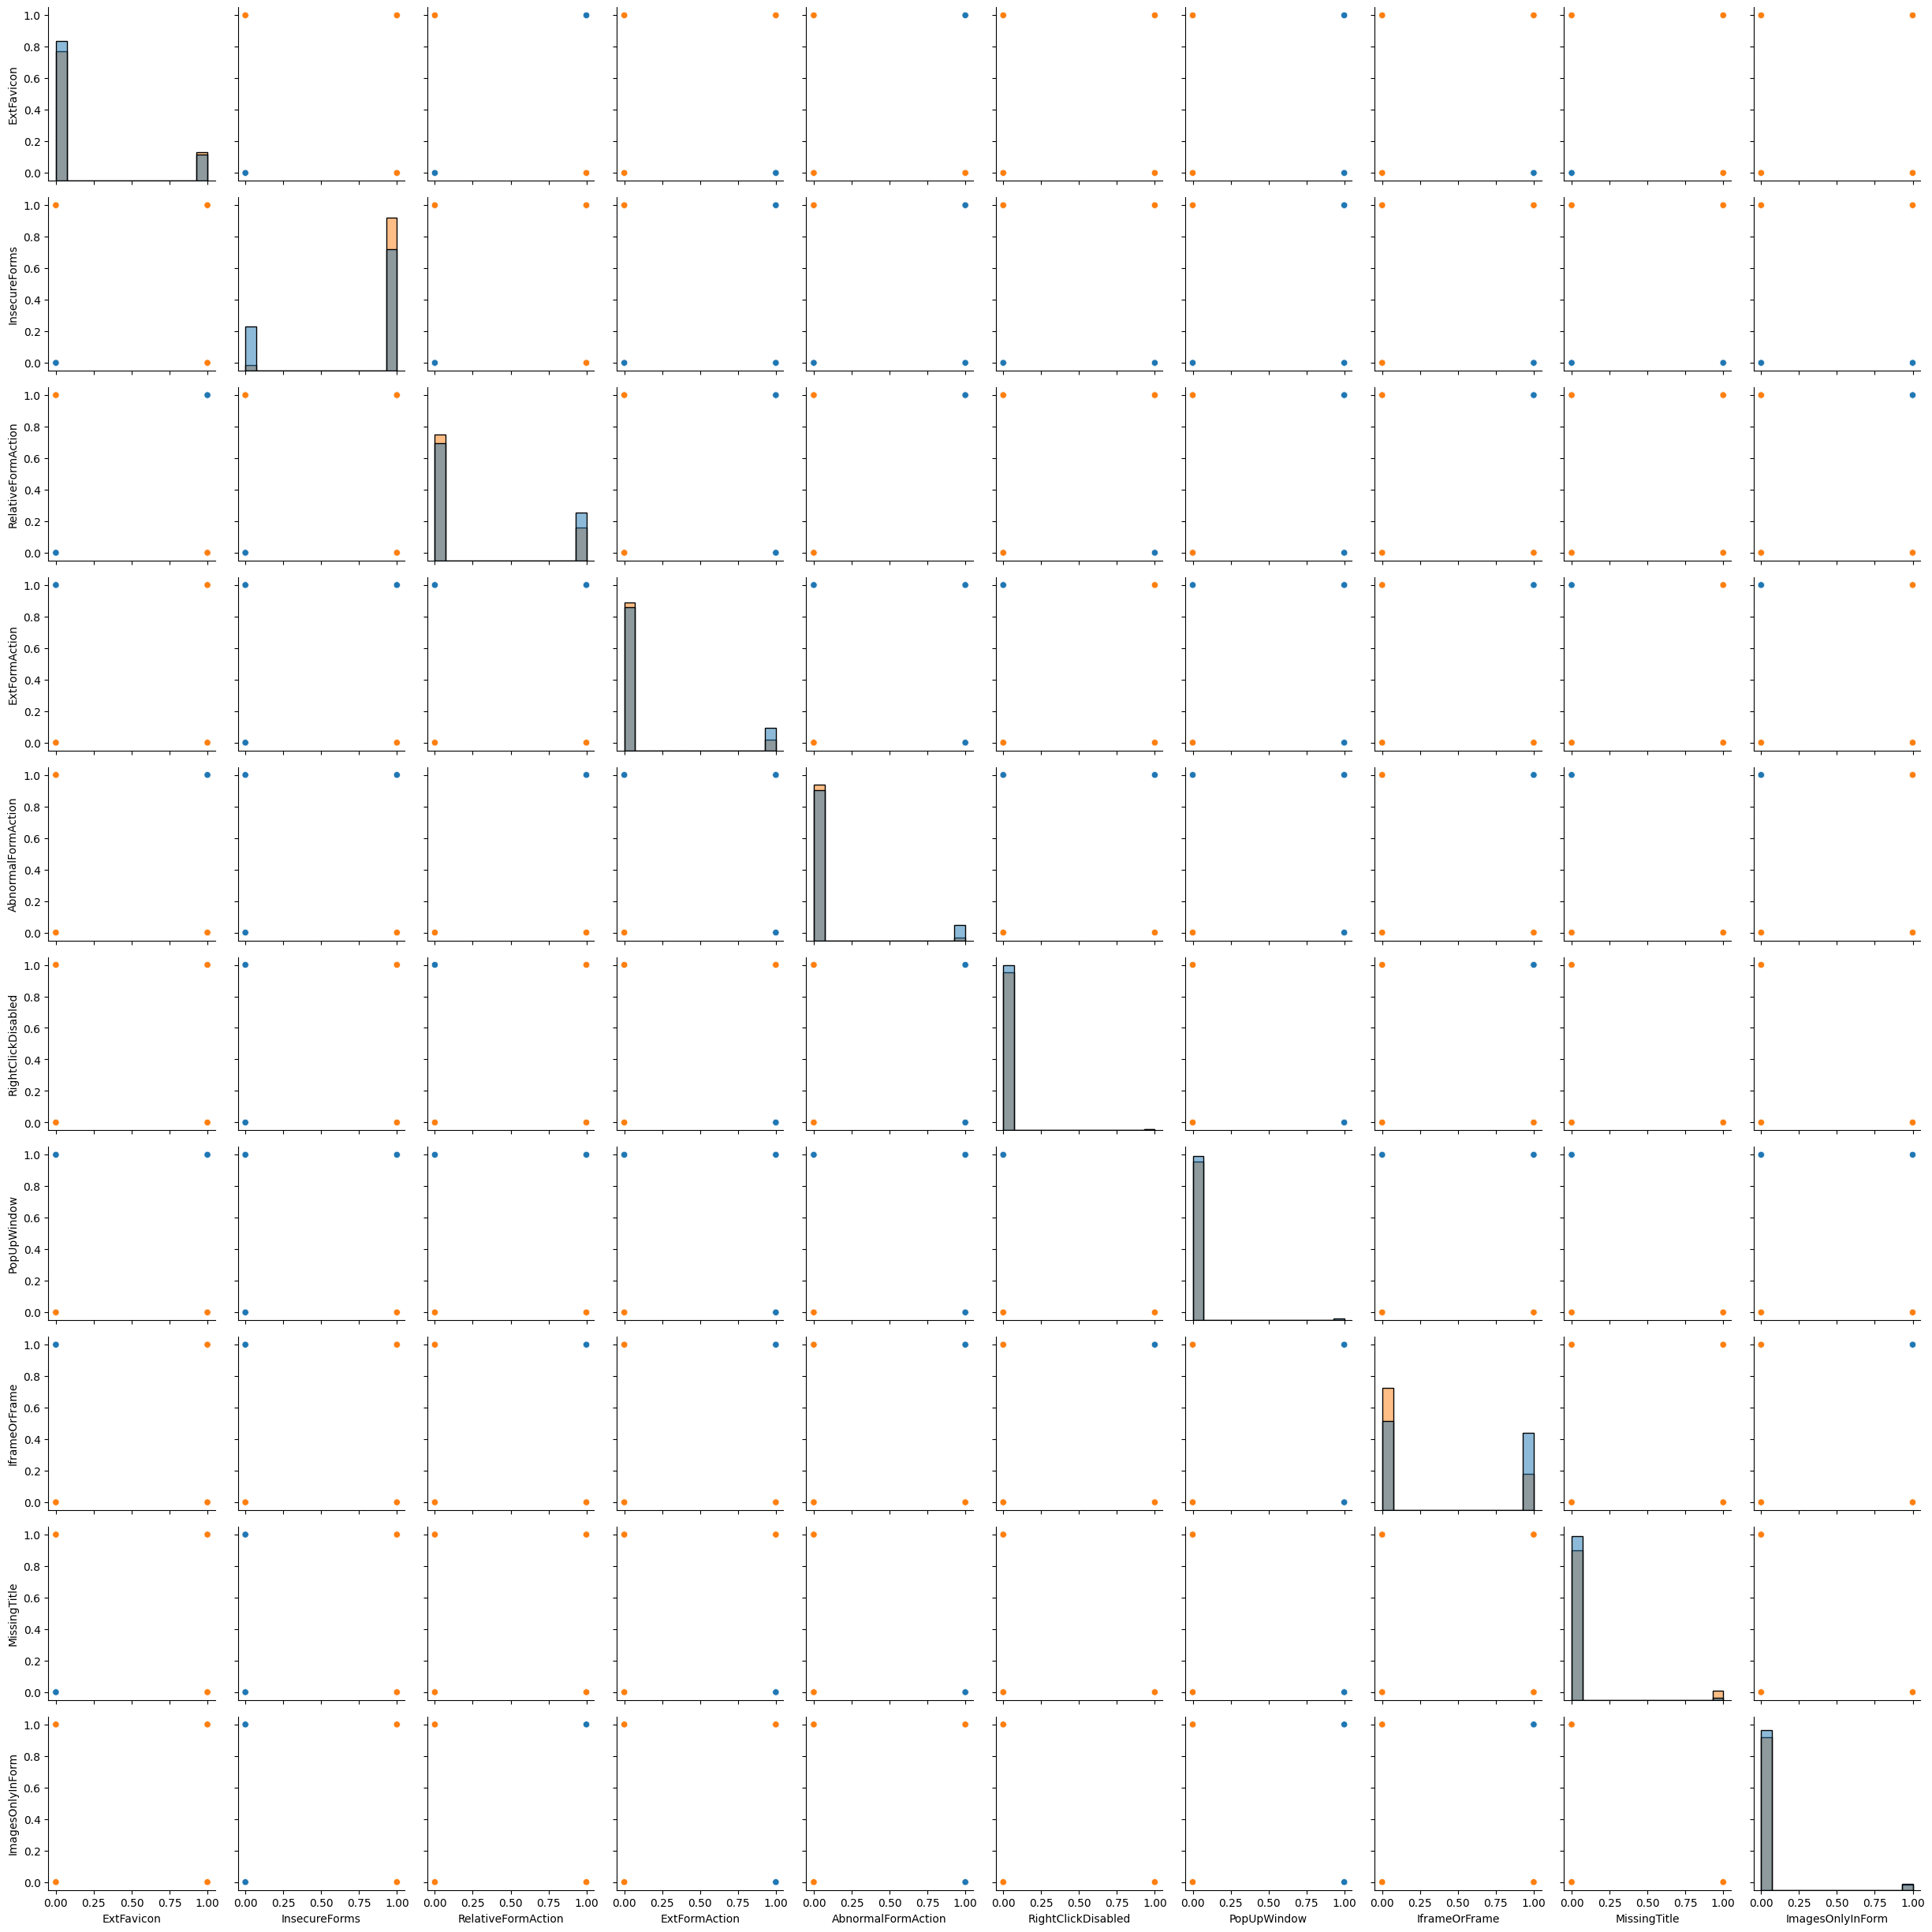

In [ ]:
#Use the groups we determined above
plot_website = ['CLASS_LABEL', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']

#Create a pair plot for each combo
g_website = sns.PairGrid(data[plot_website], hue='CLASS_LABEL')
g_website.map_diag(sns.histplot)
g_website.map_offdiag(sns.scatterplot)

Alot of these seem to be fairly correlated

## Check for outliers

This allows us to now create a new box plot for all of the features we have in our groups:

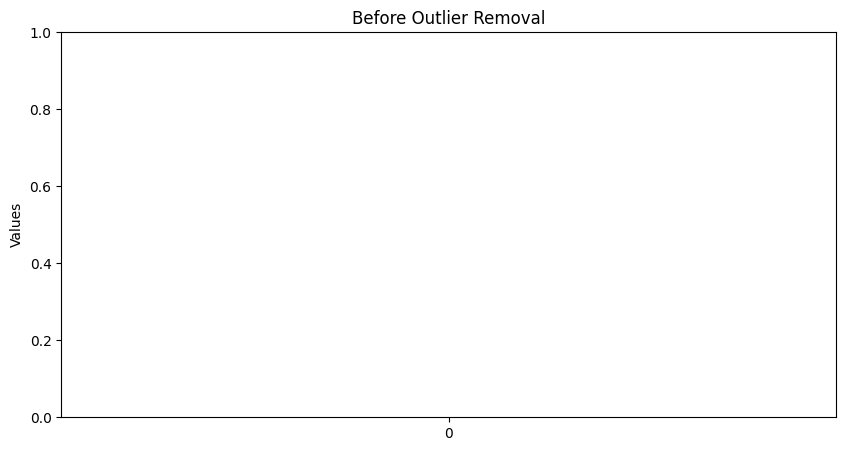

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

all_columns = data.columns.tolist()

plt.figure(figsize=(10, 5))
sns.boxplot(d=data[all_columns])
plt.title('Before Outlier Removal')
plt.ylabel('Values')
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

all_columns = data.columns.tolist()

clf_all_columns = LocalOutlierFactor(n_neighbors=15)

[-1.0892398  -1.15500976 -0.97887259 ... -1.19784313 -1.02652463
 -1.0953802 ]
[1 1 1 ... 1 1 1]


<Axes: >

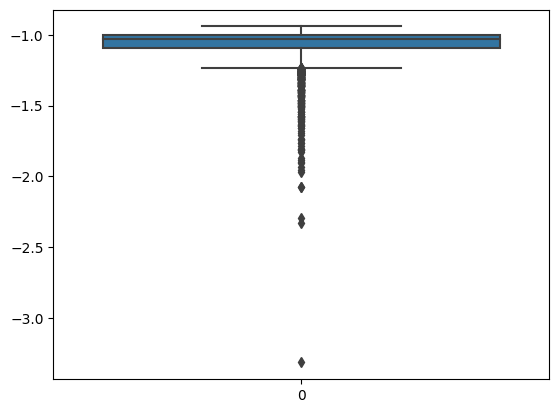

In [ ]:
# Find the label of outliers for all columns
outlier_label = clf_all_columns.fit_predict(data[all_columns].to_numpy())
print(clf_all_columns.negative_outlier_factor_)
print(outlier_label)

# Print out a visual boxplot of the negative outlier factor
sns.boxplot(clf_all_columns.negative_outlier_factor_)

#Remove outliers

In [ ]:
data = data.loc[outlier_label != -1]

Let's now print out the plot from earlier after we've run the outlier removal process:

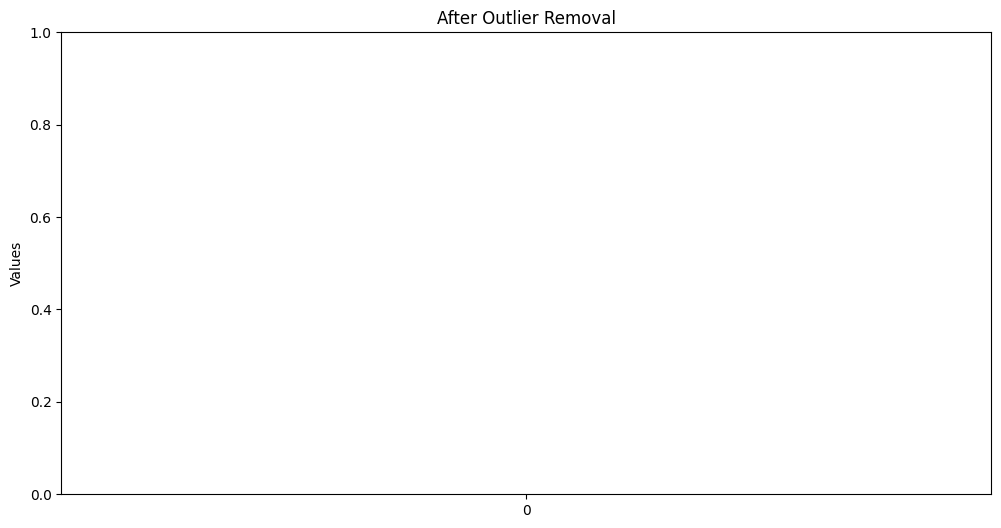

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(d=data[all_columns])
plt.title('After Outlier Removal')
plt.ylabel('Values')
plt.show()

## Feature Selection

We will be using Recursive Feature Elimination. First on the domain group

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

plot_domain = ['NumDots', 'SubdomainLevel', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'DomainInPaths', 'HostnameLength']

rfe_selection = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select = 3, step = 1)
rfe_selection.fit(data[plot_domain], data['CLASS_LABEL'])
print(rfe_selection.get_support())
data[plot_domain].columns[ rfe_selection.get_support() ]


[ True  True False False  True False False False]


Index(['NumDots', 'SubdomainLevel', 'TildeSymbol'], dtype='object')

RFE will be performed next on the path group

In [ ]:
plot_path = ['PathLevel', 'UrlLength', 'NumDash', 'NumQueryComponents', 'NumHash', 'NumNumericChars', 'PathLength', 'QueryLength', 'DoubleSlashInPath']

rfe_selection = RFE(estimator=LogisticRegression(max_iter=500),n_features_to_select=3, step=1)
rfe_selection.fit(data[plot_path], data['CLASS_LABEL'])
print(rfe_selection.get_support())
data[plot_path].columns[ rfe_selection.get_support() ]

[ True False  True  True False False False False False]


Index(['PathLevel', 'NumDash', 'NumQueryComponents'], dtype='object')

RFE will be performed next on the url group

In [ ]:
plot_url = ['RandomString', 'IpAddress', 'PctExtResourceUrls', 'URLComplexity', 'HttpsInHostname', 'NumSensitiveWords']

rfe_selectiom = RFE(estimator=LogisticRegression(max_iter=500),n_features_to_select = 3, step = 1)
rfe_selection.fit(data[plot_url], data['CLASS_LABEL'])
print(rfe_selection.get_support())
data[plot_url].columns[ rfe_selection.get_support() ]

[False  True False  True False  True]


Index(['IpAddress', 'URLComplexity', 'NumSensitiveWords'], dtype='object')

RFE will be performed next on the website group

In [ ]:
plot_website = ['ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'RightClickDisabled', 'PopUpWindow', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm']

rfe_selection = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selection.fit(data[plot_website], data['CLASS_LABEL'])
print(rfe_selection.get_support())
data[plot_website].columns[ rfe_selection.get_support() ]

[False  True False False False False  True False  True False]


Index(['InsecureForms', 'PopUpWindow', 'MissingTitle'], dtype='object')

RFE has determined these as the most important:
> 'NumDots', 'SubdomainLevel', 'TildeSymbol' from the Domain group

> 'NumDash', 'NumHash', 'DoubleSlashInPath' from the path group

> 'IpAddress', 'URLComplexity', 'NumSensitiveWords' from the url group

> 'InsecureForms', 'PopUpWindow', 'MissingTitle' from the website group

However, NumDash and NumDots are part of the URLComplexity variable that was created in Phase 1. Thus they can be removed, as URLComplexity is chosen in the url group.


##Feature removal

Of these 10 features we will be electing to remove a few. These decisions will be made using prior experience. MissingTitle could be something that was overlooked by a web dev and to us is not really an indicator of anything. TildeSymbol does not really seem like something that would be indicative of much of anything. NumHash is something else that doesnt really seem to indicative of much.

##Final Selection

Now that we have removed 3 from our best 10 from our 4 groups we are left with our 7 features we will be using. They are as follows:
1. SubdomainLevel
2. DoubleSlashInPath
3. IpAddress
4. URLComplexity
5. NumSensitiveWords
6. InsecureForms
7. PopUpWindow

# Project Phase IV - Exploratory Data Analysis & Feature Selection using Decision Trees

## Decision Tree Creation

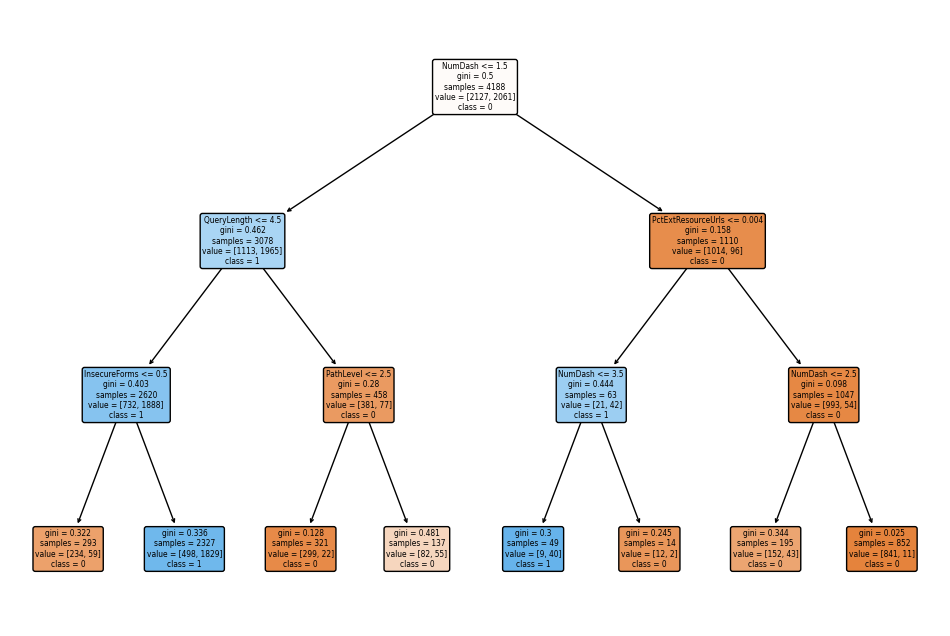

Most Influential Features:
           Feature  Importance
           NumDash    0.519159
       QueryLength    0.237359
     InsecureForms    0.177410
PctExtResourceUrls    0.044844
         PathLevel    0.021228


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

target_column = "CLASS_LABEL"

#Remove "CLASS_LABEL"
X = data.drop(target_column, axis=1)
#Set "CLASS_LABEL"
y = data[target_column]

clf = DecisionTreeClassifier(random_state=0, max_depth=3)

clf.fit(X, y)

classes = clf.classes_.tolist()
str_classes = [str(item) for item in classes]
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns.to_list(), class_names=str_classes, rounded=True)
plt.show()

# Create a DataFrame to display feature importances
feature_importance = clf.feature_importances_
feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

#Display
print("Most Influential Features:")
print(feature_importance_data.head().to_string(index=False))


### What is the most influential feature?

1. NumDash - .423 Importance - This could because deceptive URLs often are extremely long and contain large amounts of dashes. However, having large amounts of dashes is not inherently indicative of a phishing link

2. InsecureForms - .235 Importance - We would have guessed this too be extremely indicative of a phishing link. But, according to the model it is #2.

3. NumQueryComponents - .191 Importance - Similar to NumDash this is something that is used to make a URL extremely long and deceptive.







### How to increase confidence?

We will be doing Cross Validation to increase our confidence.

In [ ]:
from sklearn.model_selection import cross_val_score

X = data.drop(target_column, axis=1)
y = data[target_column]

clf = DecisionTreeClassifier(random_state=0, max_depth=3)

#8 fold validation
cross_validation_scores = cross_val_score(clf, X, y, cv=8, scoring='accuracy')

print("Scores:", cross_validation_scores)
print("Score:", cross_validation_scores.mean())


Scores: [0.86832061 0.80152672 0.82633588 0.83587786 0.83938815 0.80497132
 0.8374761  0.83365201]
Score: 0.8309435800505014


On a scale of 0.00 to 1.00 a .800 is acceptable and indicates a high reliability.

Next we made a confusion matrix which will show us different types of errors. Which will be calculated as accuracy, recall, precision, and f1

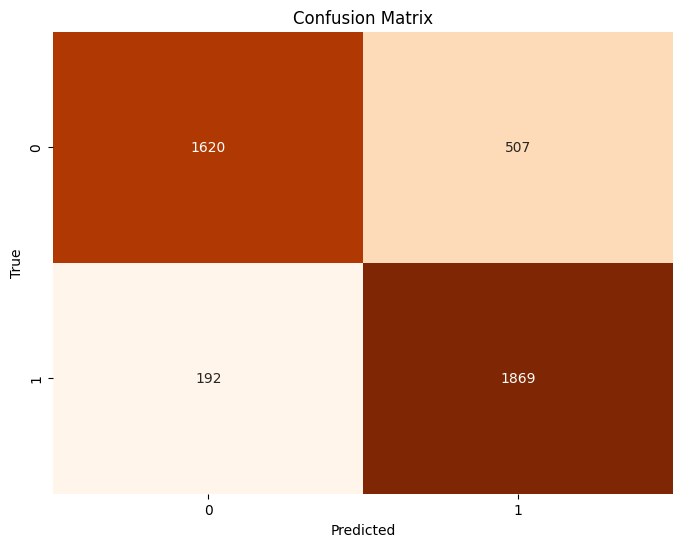

Accuracy: 0.833
Precision: 0.787
Recall: 0.907
F1 Score: 0.842


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = data.drop(target_column, axis=1)
y_true = data[target_column]

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X, y_true)

y_pred = clf.predict(X)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred)

recall = recall_score(y_true, y_pred)

f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

This confusion matrix shows that we have really low rates of false poistives and negatives (bottom left, top right) and really high rates of true poistives and negatives (top left, bottom right).

## Decision Tree Training

### Determining Best Value

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {
    'max_depth': [None, 5, 10, 15, 25, 30, 50, 100],
    'min_samples_split': [1, 5, 10, 20, 30, 50, 100]
}

grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict_proba(X)[:, 1]

# Calculate AUC on the test set
auc_score = roc_auc_score(y, y_pred)
print("AUC for best decsion tree model:", auc_score)

Best Parameters: {'max_depth': 15, 'min_samples_split': 50}
AUC for best decsion tree model: 0.9868100280422205


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

Best values:

max_dept: 15

min_samples_split: 50

In [ ]:
from sklearn.metrics import classification_report

best_model.fit(X, y)

y_pred = best_model.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2127
           1       0.94      0.93      0.94      2061

    accuracy                           0.94      4188
   macro avg       0.94      0.94      0.94      4188
weighted avg       0.94      0.94      0.94      4188



As is generally the goal, the goal is to get as close to 1.00 as you can. With this in mind, .93 is definitely acceptable.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, auc

param_grid = {
    'C': [0.1, 10, 50],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC(probability=True, random_state=0)

grid_search = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_svm = grid_search.best_estimator_
y_pred_prob = best_svm.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_pred_prob)

print("AUC for best SVM model:", roc_auc)

More info on the model

In [ ]:
from sklearn.metrics import classification_report

# Fit the model on the entire training set (if not done already)
best_svm.fit(X, y)

# Predict on the test set
y_pred = best_svm.predict(X)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

The precision, recall, and f1-scores are all .3 lower than the decision tree but are still well above reason.

### Training the Model

ROC curve for the decision tree

In [ ]:
from sklearn.metrics import roc_curve, auc


#Prediction
y_pred_prob = best_model.predict_proba(X)[:, 1]

#Plot
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Random classifier (baseline)', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


As always the closer you are to 1.00 you are the better the model is. So a .9868 is excellent for our model. We will still need to test it on fresh data.

## Summary

Our model's ROC value is .9868 out of 1.00 which means we can predict malicious websites with an extreme level of certainty. Our model's SVM value was .9624 out of 1.00 which means we can predict where a website is malicious or not with extreme certainty.

#Project Phase V- Model Building and Prediction

##Intro

In phase 4 we decided on our 7 featues we will be using to predict:

1. SubdomainLevel
2. DoubleSlashInPath
3. IpAddress
4. URLComplexity
5. NumSensitiveWords
6. InsecureForms
7. PopUpWindow

First we will create the X dataframe that cotains these features.

In [ ]:
X = data[["SubdomainLevel", "DoubleSlashInPath", "IpAddress", "URLComplexity", "NumSensitiveWords", "InsecureForms", "PopUpWindow"]]
X.head()

Next we create the Y data frame that is out target variable.

In [ ]:
y = data[["CLASS_LABEL"]]
y

In [ ]:
#Seperate the data into training and testing data frames.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5244)

We will be using the same models as were used at the end of Phase IV

Decision Tree

Random Forest

SVM

MLPRegressor

First is RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30, ],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [4, 5],
    "bootstrap": [True, False]
}

rf_clf = RandomForestClassifier(random_state=5244)

grid_search = GridSearchCV(rf_clf,param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_paramater
print("Best Parameters:", best_paramater)

best_rf = grid_search.best_estimate

random_forest = best_rf.predict_proba(X_test)[:, 1]

random_forest_auc = roc_auc_score(y_test, random_forest)
print("AUC for best Random Forest Classifier:", random_forest_auc)

Next is DecisionTree

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 60, 100],
    "min_samples_split": [10, 30, 50],
    "min_samples_leaf": [1, 2, 6],
}

clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = grid_search.best_estimator_

decison_tree_prob = best_clf.predict_proba(X_test)[:, 1]

decision_tree_auc = roc_auc_score(y_test, decison_tree_prob)
print("AUC for best decsion tree model:", decision_tree_auc)

Next is MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    "hidden_layer_sizes": [(50), (100), (50, 50)],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "invscaling", "adaptive"]
}
mlp = MLPRegressor(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_mlp = grid_search.best_estimator_

mlp_y_pred = best_mlp.predict(X_test)
binary_predicted_y = np.where(mlp_y_pred >= 0.5, 1, 0)

mlp_auc = roc_auc_score(y_test, binary_predicted_y)
print("AUC for best MLP Regressor:", mlp_auc)

Next is SVC

In [ ]:
from sklearn.svm import SVC

param_grid = {
    "C": [1, 10, 50],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}

svm = SVC(probability=True, random_state=0)

grid_search = GridSearchCV(svm, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_svm = grid_search.best_estimator_

svm_prob = best_svm.predict_proba(X_test)[:, 1]

svm_roc_auc = roc_auc_score(y_test, svm_prob)
print("AUC for best SVM model:", svm_roc_auc)

Now that we have run all 4 models we can determine which one is best. This would be the one with the highest score out of 1.00

RandomForest -

DecisionTree -

MLPRegressor -

SVC -

To make this more digestable we can display the precision, recall, and f1 score for all of them.

In [ ]:
decision_tree_predicted_y = best_clf.predict(X_test)
random_forest_predicted_y = best_rf_clf.predict(X_test)
svm_predicted_y = best_svm.predict(X_test)

# Print summary for each model
print("Best decision tree model summary:")
print(classification_report(y_test, decision_tree_predicted_y))

print("Best random forest model summary: ")
print(classification_report(y_test, random_forest_predicted_y))

print("Best SVM model summary: ")
print(classification_report(y_test, svm_predicted_y))

print("Best MLP Regressor model summary: ")
print(classification_report(y_test, binary_predicted_y))

Based on this we can determine that ANSWER HERE is the best model.

These are the optimal parameters given to us by the model.

Now, lets look at the ROC for ANSWER HERE:

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, random_forest_y_pred_prob)
roc_auc = auc(fpr, tpr)

print("Random Forest AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Random classifier (baseline)', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Next lets look at the Confusion Matrix for ANSWER HERE:

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, random_forest_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf_clf.classes_, yticklabels=best_rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Prepare testing data

Now that we have justified why the model we chose is the best it is time to prepare the testing data. We will be taking the same steps as we did in Phase I to prepare the training data.

In [ ]:
test_data = pd.read_csv("Phishing_Legitimate_test_student.csv", index_col="id", na_values=['',' ','n/a'])
print(test_df.shape)
test_data.head()

Normalize the data exactly how we did the training set.

In [ ]:
#Create the variable for the averages
data["URLComplexity"] = np.mean(test_data[["NumDots", "NumDash", "NumDashInHostname", "NumUnderscore", "NumPercent", "NumAmpersand", "NumHash"]],axis=1)
#Set a maximum
max_URL_Complexity = test_data['URLComplexity'].max()
#Set a minimum
min_URL_Complexity = test_data['URLComplexity'].min()
data["URLComplexity"] = (test_data["URLComplexity"]-min_URL_Complexity)/(max_URL_Complexity-min_URL_Complexity)
data["URLComplexity"]

This part will be a bit different due to us already knowing which of our features we have selected. Thus, we can remove all unimportant features.

In [ ]:
cols_to_keep = ["SubdomainLevel", "DoubleSlashInPath", "IpAddress", "URLComplexity", "NumSensitiveWords", "InsecureForms", "PopUpWindow"]
test_data = test_data[cols_to_keep]
test_data.head()